In [1]:
import os

import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.linear_model import RidgeClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.tree import ExtraTreeClassifier, DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid, KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.model_selection import cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('/data/home/vpsc95/Downloads/DevanagariHandwrittenCharacterDataset/Dev_train.csv')
df['character_class'] = LabelEncoder().fit_transform(df.character)
df.drop('character', axis=1, inplace=True)
df = df.astype(np.uint8)

df2 = pd.read_csv('/data/home/vpsc95/Downloads/DevanagariHandwrittenCharacterDataset/Dev_test.csv')
df_example = df2
df2['character_class'] = LabelEncoder().fit_transform(df2.character)
df2.drop('character', axis=1, inplace=True)
df2 = df2.astype(np.uint8)

In [3]:
# X = np.array(df1.iloc[0:1022])
df_train = np.array(df.values)
df_test = np.array(df2.values)

x_train = (df_train[:, 0:1024])
y_train = (df_train[:, 1024])
x_test = (df_test[:, 0:1024])
y_test = (df_test[:, 1024])

print (np.shape(x_train), len(x_train))
print (np.shape(y_train), len(y_train))

# Sample Row
print (len(x_train[78199]))
print (y_train[78199])

x_train = x_train.reshape(x_train.shape[0], 32, 32, 1)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 1)

# Normalize
x_train = x_train / 255.
x_test = x_test / 255.



(78200, 1024) 78200
(78200,) 78200
1024
45


(-0.5, 31.5, 31.5, -0.5)

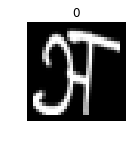

In [4]:
plt.subplot(131) #(131) -> 1 row, 3 columns, the first plot  
plt.imshow(x_train[0][:,:,0], cmap='gray')
plt.title(y_train[0])
plt.axis('off')

In [5]:
from keras import utils

y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)


num_classes = 46
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)



/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
from tensorflow.keras.callbacks import TensorBoard
import time
from keras.backend import clear_session


import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import SGD
#To clear model weights after each run
from keras.backend import clear_session



In [8]:
Name = '2-Conv2D-2-Dense'
tensorboard = TensorBoard(log_dir="/home/vpsc95/Downloads/DevanagariHandwrittenCharacterDataset/Logs/{}".format(Name))

clear_session()
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
# Max pooling
#     model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

#initalize an optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay = 1e-6)
model.summary()

model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, validation_split = 0.2, epochs = 10, verbose=1, callbacks=[tensorboard])

preds = model.evaluate(x_test, y_test)

print(model.metrics_names)
print(preds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               3211776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
__________

In [9]:
Name = "2-Conv2D-3-Dense"
tensorboard = TensorBoard(log_dir="/home/vpsc95/Downloads/DevanagariHandwrittenCharacterDataset/Logs/{}".format(Name))

clear_session()
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
# Max pooling
#     model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

#initalize an optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay = 1e-6)
model.summary()

model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, validation_split = 0.2, epochs = 10, verbose=1, callbacks=[tensorboard])

preds = model.evaluate(x_test, y_test)

print(model.metrics_names)
print(preds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________

In [10]:
Name = "3-Conv2D-2-Dense"
tensorboard = TensorBoard(log_dir="/home/vpsc95/Downloads/DevanagariHandwrittenCharacterDataset/Logs/{}".format(Name))

clear_session()
model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 1)))
# Max pooling
#     model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
# Max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

#initalize an optimizer
opt = keras.optimizers.rmsprop(lr=0.001, decay = 1e-6)
model.summary()

model.compile(loss='categorical_crossentropy', optimizer = opt, metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, validation_split = 0.2, epochs = 10, verbose=1, callbacks=[tensorboard])

preds = model.evaluate(x_test, y_test)

print(model.metrics_names)
print(preds)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               1605888   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
__________